# Problem 1: Classification

You are required to implement a single layer neural network (*perceptron*) and to evaluate its effectiveness on a classification problem. You will deal with two classes, C1 and C2, where each object is represented by two *features* X1 and X2.

## Exercise 1.1

In this part, you will play the role of the *oracle*. The requirements for generating the data points are the following.

+ you have N = 250 points per class;
+ the probability distribution for X1 for each class is following::
    1. class 1, a normal distribution with mean 0.5 and standard deviation 1.5
    2. class 2, a normal distribution with mean 5.4 and standard deviation 0.5
+ the probability distribution for X2 for each class is the following:
    1. class 1, a Poisson distribution with lambda 1.5
    2. class 2, an exponential distribution with *scale* parameter equal to 2
+ for class 1, you will use the label +1, for class 2 the label -1.
+ before generating the data, set the random seed equal to the last four digits of your student id (i.e., if your student id is 2004312, the seed will be 4312)

In [2]:
# write your answer here
import numpy as np

# set random seed
np.random.seed(941)

# generate N points per class
N=250

# draw samples for X1
X1_1 = np.random.normal(loc=0.5, scale=1.5, size = N)
X1_2 = np.random.normal(loc= 5.4, scale=0.5, size =N)

# draw samples for X2
X2_1 = np.random.poisson(lam=1.5, size=N)
X2_2 = np.random.exponential(scale=2, size=N)

# set labels
y1 = np.ones(N)
y2 = -np.ones(N)

## Exercise 1.2 

Draw a scatter plot to show the distribution of points of the two classes.

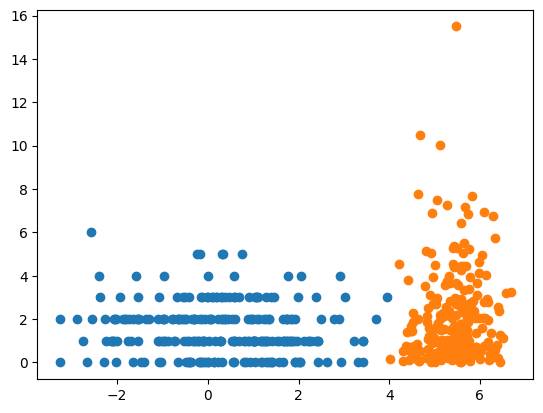

In [3]:
# write your answer here
import matplotlib.pyplot as plt

plt.scatter(X1_1, X2_1)
plt.scatter(X1_2, X2_2)

## Exercise 1.3

Create the matrix of points X (each row is an object, each column a feature). Do not forget to add the bias X0.
Create the output vector y.


In [4]:
# write your answer here

X = np.stack((np.ones(N*2),
            np.concatenate((X1_1, X1_2)),
            np.concatenate((X2_1, X2_2))),
            axis=1)

y = np.concatenate((y1,y2))

## Exercise 1.4

Train a *perceptron* using a **mini-batch stochastic gradient descent approach** with the following requirements:
+ initialize the vector of parameters *w* with a normal distribution with mean 0 and standard deviation
+ Set the parameter *eta* equal to 1e-4
+ Use a mini-batch of size 20
+ Set the maximum number of epochs equal to 500
+ Save in a vector named [errors_epoch] the number of misclassified objects for each epoch.

In [5]:
# write your answer here
# generate w_0,....,w_n
w = np.random.randn(3)

# set learning rate 
eta = 1e-4

# set mini-batch size
batch_size= 20

# set max epochs
max_epochs  = 100

# set errors per epoch
errors_epoch = np.zeros(max_epochs)

# start training
for epoch in range(max_epochs):
    
    # compute number of errors 
    errors_epoch[epoch] = sum((y * np.sign(np.dot(X, w))) < 0)
    
    # generate random permutations 
    rand_perm = np.random.permutation(range(y.shape[0]))
    X = X[rand_perm, :]
    y = y[rand_perm]
    
    for j in range(0, y.shape[0], batch_size):
        
        X_batch = X[j:(j+ batch_size), :]
        y_batch = y[j:(j+batch_size)]
        
        errors = y_batch - np.dot(X_batch, w)
        
        w = w + eta * np.dot(np.transpose(X_batch), errors)

errors_epoch[epoch] = sum((y * np.sign(np.dot(X, w))) < 0)

In [6]:
errors_epoch

array([259., 238., 143.,  22.,  11.,  11.,  11.,  11.,  10.,   8.,   8.,
         8.,   9.,   9.,   8.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,
         9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,
         9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,
         9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,
         9.,   9.,   9.,   9.,   9.,   9.,  10.,   9.,   9.,   9.,   9.,
        10.,  10.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,   9.,
         9.,  10.,   9.,  10.,  10.,   9.,  10.,  10.,   9.,   9.,  10.,
        10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,
        10.])

## Exercise 1.5

Draw two plots: the first plot shows the data points and the separating hyperplane; the second plot, the trend of the number of errors per epoch.


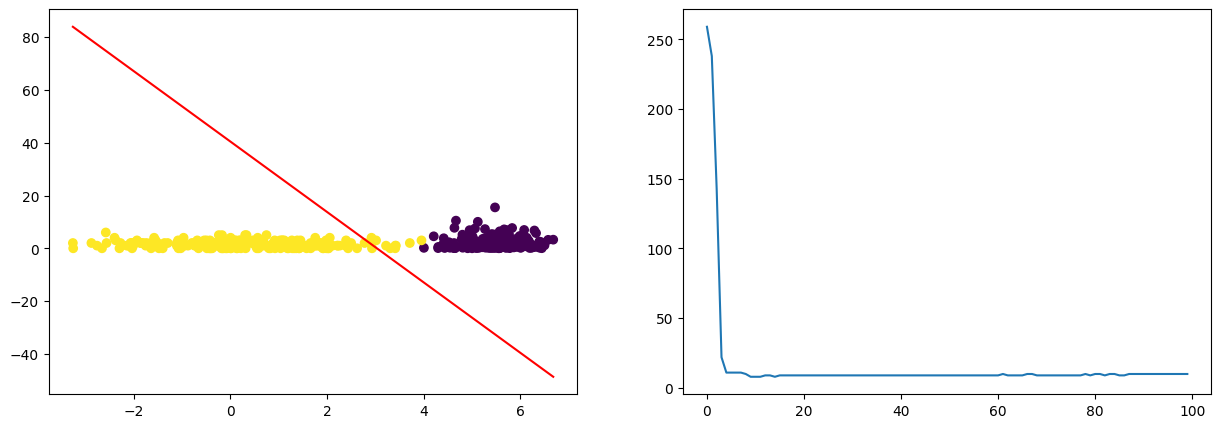

In [7]:
# write your answer here
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
axs[0].scatter(X[:, 1], X[:, 2], c=y)
axs[0].plot([np.min(X[:, 1]), np.max(X[:, 1])], [np.min(X[:, 1]) * (-w[1]/w[2]) - w[0]/w[2], np.max(X[:, 1]) * (-w[1]/w[2]) - w[0]/w[2]], c= "red")

axs[1].plot(range(max_epochs), errors_epoch)


# Problem 2: Regression

You are required to build a closed-form solution for the regression problem.


## Exercise 2.1

You will play the role of the *oracle* once again. The requirements are the following:
+ the target function is a cubic function aX^3 + bX^2 + cX + d with values a = 1.5, b = -1, c = 2, d = 3. 
+ You have also some gaussian noise added to the data points with mean 0 and standard deviation 1.5.
+ The target function is sampled using the values already created for coordinate X1 during the previous problem.

In [8]:
# write your answer here




## Exercise 2.2

Your hypothesis set *H(x)* is a polynomial function with degree equal 2. Generate the dataset *X_reg* following this hypothesis (including the bias term X0).


In [9]:
# write your answer here
# create (quadtratic) data matrix




## Esercise 2.3

Find the optimal vector of parameters *w_reg* using the closed form solution.

In [10]:
# write your answer here
# find closed form solution
# w = (X^T  X)^-1 (X^T y)




## Exercise 2.4

Draw the points of the dataset together with your solution.

In [11]:
# plot points


# generate grid of points


# plot line
